In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [4]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [5]:
#Feature scaling

from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
training_set_scaled= sc.fit_transform(training_set)

In [6]:
#creating a data structure
X_train = []
y_train =[]

for i in range (60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train,y_train = np.array(X_train),np.array(y_train)

In [7]:
#reshaping

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [8]:
#building RNN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

/Users/fatmakursun/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))


In [11]:
regressor.add(Dense(units=1))

In [12]:
regressor.compile(optimizer='adam', loss = 'mse')

In [13]:
regressor.fit(X_train,y_train,epochs=200, batch_size=32)

Epoch 1/200
1198/1198 [==============================] - 16s 13ms/step - loss: 0.0499
Epoch 2/200
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0067
Epoch 3/200
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0054
Epoch 4/200
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0057
Epoch 5/200
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0049
Epoch 6/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0049
Epoch 7/200
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0047
Epoch 8/200
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0041
Epoch 9/200
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0038
Epoch 10/200
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0046
Epoch 11/200
1198/1198 [==============================] - 10s 9ms/step - loss: 0.0039
Epoch 12/200
1198/1198 [==============================] - 10s 

1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 97/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0014
Epoch 98/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0015
Epoch 99/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0015
Epoch 100/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0013
Epoch 101/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0013
Epoch 102/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0016
Epoch 103/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0013
Epoch 104/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 105/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 106/200
1198/1198 [==============================] - 9s 8ms/step - loss: 0.0014
Epoch 107/200
1198/1198 [==============================] - 10s 8ms/s

1198/1198 [==============================] - 10s 8ms/step - loss: 0.0011
Epoch 191/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0011
Epoch 192/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.4703e-04
Epoch 193/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.9978e-04
Epoch 194/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.4924e-04
Epoch 195/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.9597e-04
Epoch 196/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.8778e-04
Epoch 197/200
1198/1198 [==============================] - 10s 8ms/step - loss: 9.5152e-04
Epoch 198/200
1198/1198 [==============================] - 10s 8ms/step - loss: 0.0010
Epoch 199/200
1198/1198 [==============================] - 10s 9ms/step - loss: 9.0533e-04
Epoch 200/200
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0010


In [14]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[:,1:2].values

In [15]:
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

In [16]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)


In [17]:
X_test= []

for i in range (60,80):
    X_test.append(inputs[i-60:i,0])
X_test= np.array(X_test)

In [18]:
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [19]:
predicted_stock_price = regressor.predict(X_test)

In [20]:
predicted_stock_price= sc.inverse_transform(predicted_stock_price)

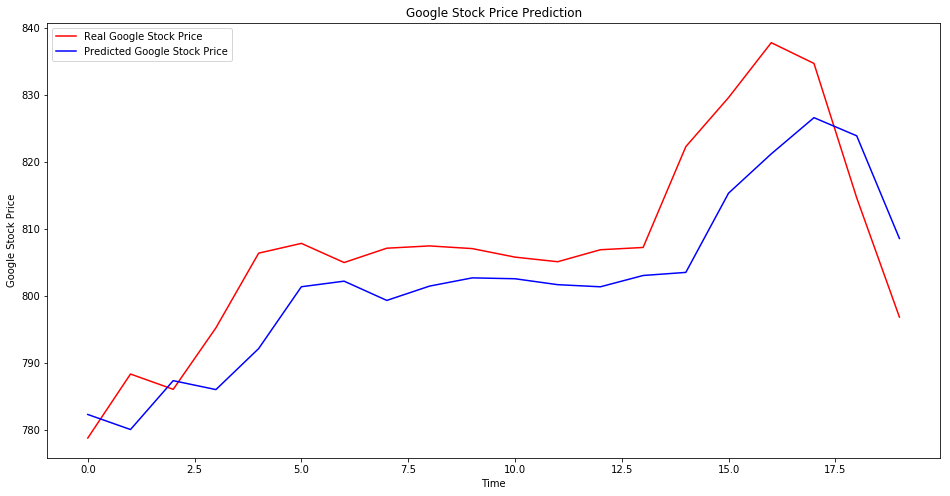

In [22]:
plt.figure(figsize=(16,8))
plt.plot(real_stock_price, color='red',label= 'Real Google Stock Price')
plt.plot(predicted_stock_price, color= 'blue', label= 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()